In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#Changing defaults fonts for plot

font = {'family' : 'sans-serif',
        'size'   : 18}
plt.rc('font', **font)

In [3]:
#Reading data and preparing it for plotting

df= pd.read_csv("2nd_fullscrape_clean.csv", index_col= 0, encoding='latin-1')
lpdf = df[df["Price"] < 200].copy() #Only looking at "low price" wine
lpdf["PR"] = list(zip(lpdf["Price"], lpdf["Rating"])) #Looking to get (Price, Rating) pairs
uPR = lpdf.groupby("PR").size() #Getting number of unique Price,Rating combinations
uPRdf = pd.DataFrame(uPR, columns=["count"])  #Making series into DataFrame
uPRdf.reset_index(inplace=True) #Making tuples a column in the DataFrame
uPRdf[['Price', 'Rating']] = uPRdf['PR'].apply(pd.Series) #Splitting tuples into seperate columns
#apply(pd.Series) splits each tuple into 2 columns
uPRdf.sort_values(by=["count"], ascending=True, inplace=True) #Sorting by the number of times each combo appears

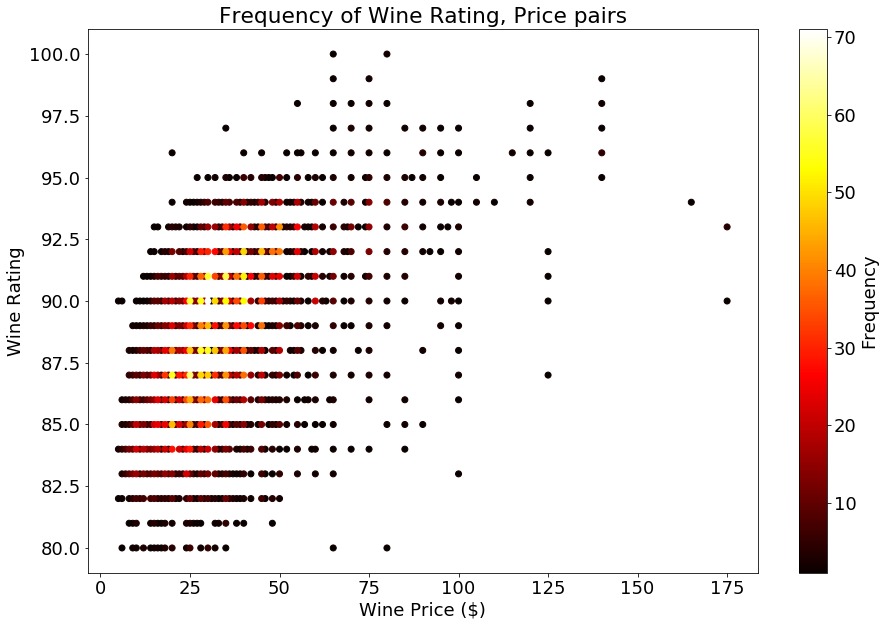

In [4]:
#Scatter plot where marker color corresponds to how common the Price,Rating combo is
plt.close("all")
fig, ax = plt.subplots(figsize=(15,10))

cc =ax.scatter(uPRdf["Price"], uPRdf["Rating"],c=uPRdf["count"], cmap=cm.hot)
cbar = plt.colorbar(cc)

ax.set_xlabel("Wine Price ($)")
ax.set_ylabel("Wine Rating")
ax.set_title("Frequency of Wine Rating, Price pairs")

cbar.set_label('Frequency')

plt.show() 

Plot of rating and price of approximately 7,000 different bottles of Syrah wines grown in the United States. The color of the scatter plot indicates the number of bottles at a given rating and price.